# Diving into Amazon UK Product Insights

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

In [123]:
# file path
file_path = r'C:\Users\joann\OneDrive - University of Twente\Desktop\IRONHACK\CourseWork\Week5\Week1\Day1\Amazon_dataset\amz_uk_processed_data.csv'

# Loading the dataset
df = pd.read_csv(file_path)

In [124]:
# Displaying the first few rows of the DataFrame
df.head()
#df.columns

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Analyzing Best-Seller Trends Across Product Categories

In [ ]:
# Objective: Understand the relationship between product categories and their best-seller status.
# Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.
# Are there categories where being a best-seller is more prevalent?
# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [119]:
# Crosstab between product category and isBestSeller status
crosstab_df = pd.crosstab(df['categoryName'], df['isBestSeller'])

# proportion of best-sellers for each category
crosstab_df['proportion_best_seller'] = crosstab_df[True] / (crosstab_df[True] + crosstab_df[False])

# Sorting the categories based on the proportion of best-sellers in descending order an drounding to 2dp
crosstab_df_sorted = round(crosstab_df.sort_values(by='proportion_best_seller', ascending=False), 2)

print(crosstab_df_sorted)


isBestSeller                 False  True  proportion_best_seller
categoryName                                                    
Health & Personal Care        7750   485                    0.06
Grocery                       5964   313                    0.05
Mobile Phone Accessories       244    10                    0.04
Power & Hand Tools            6212   243                    0.04
Billiard, Snooker & Pool       241     8                    0.03
...                            ...   ...                     ...
Cameras                         12     0                    0.00
Outdoor Rope Lights           3911     0                    0.00
Computer Cases                 222     0                    0.00
Motorbike Seat Covers          249     0                    0.00
eBook Readers & Accessories    244     0                    0.00

[296 rows x 3 columns]


In [133]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category
chi2, p, _, _ = chi2_contingency(crosstab)
print("Chi-square Test Statistic:", chi2)
print("P-value:", p)

Chi-square Test Statistic: 33019.04971964154
P-value: 0.0


In [132]:
# Compute Cramér's V to understand the strength of association between best-seller status and category
from scipy.stats.contingency import association

association(crosstab, method="cramer")

0.1218814906639688

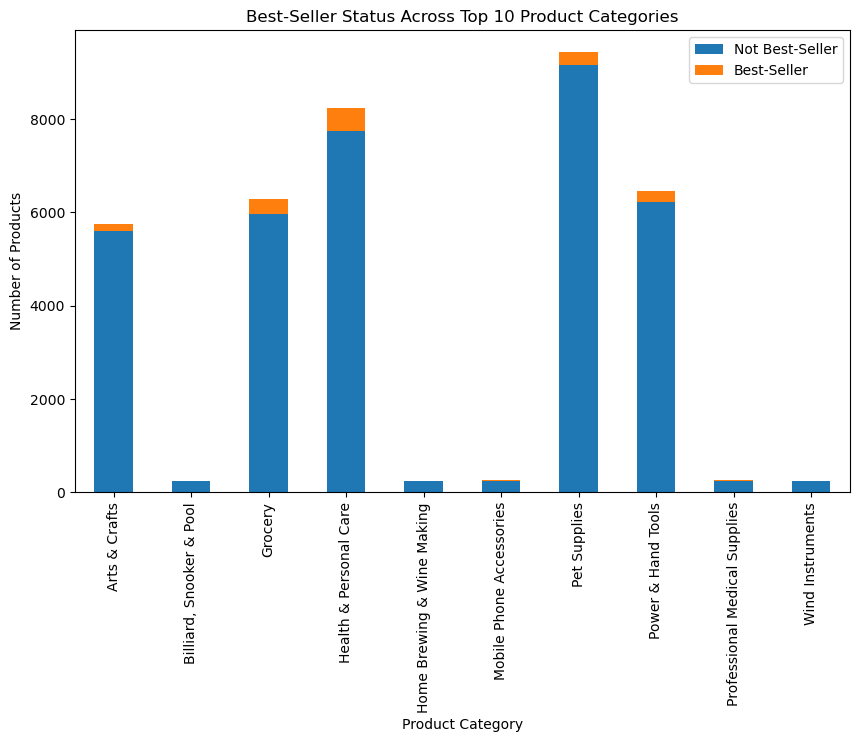

In [139]:
# Filter categories based on the highest proportion of best-sellers (top 10)
top_10_categories = crosstab_df_sorted.head(10).index

# Filter the original dataframe based on the top 10 categories
df_top_10_categories = df[df['categoryName'].isin(top_10_categories)]

# Crosstab between the filtered categories and isBestSeller status
crosstab_top_10_categories = pd.crosstab(df_top_10_categories['categoryName'], df_top_10_categories['isBestSeller'])

# Stacked bar chart
crosstab_top_10_categories.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Best-Seller Status Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(['Not Best-Seller', 'Best-Seller'], loc='upper right')
plt.xticks(rotation=90)
plt.show()


# Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

In [140]:
#Removing outliers in product prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

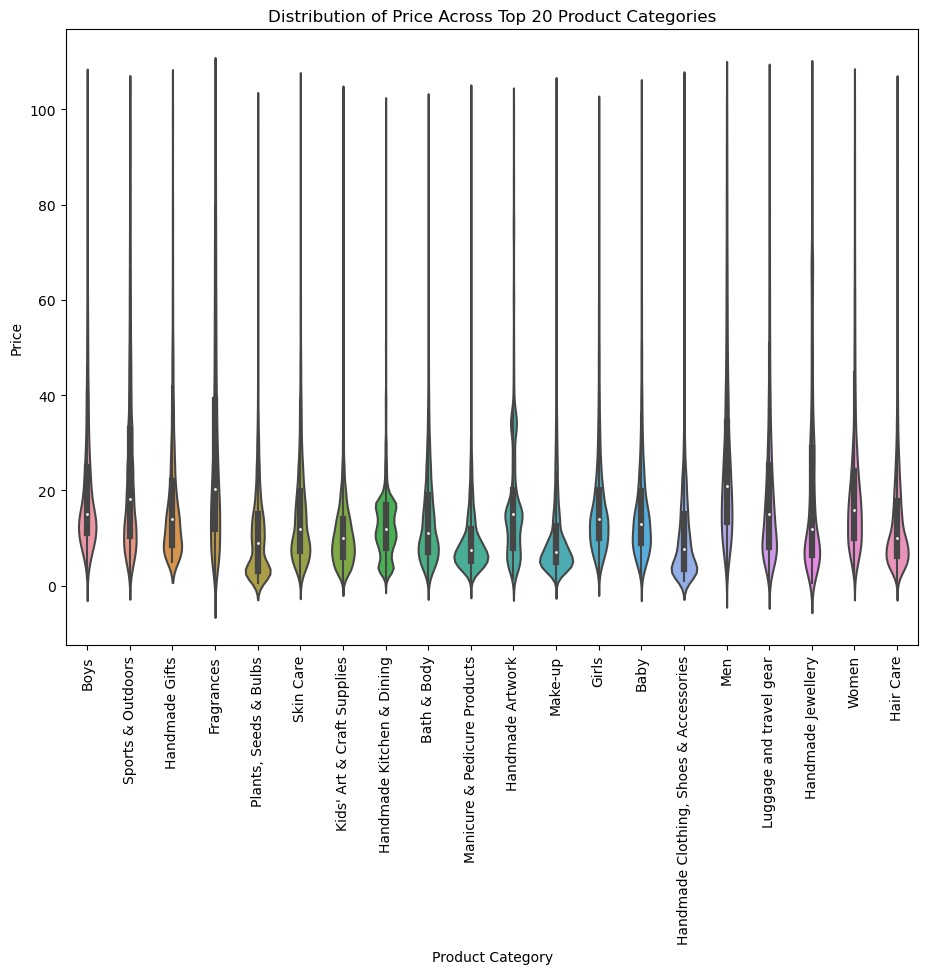

In [142]:
import seaborn as sns

# distribution of price across different product categories (top 20)
top_20_categories = df_no_outliers['categoryName'].value_counts().head(20).index
df_top_20_categories = df_no_outliers[df_no_outliers['categoryName'].isin(top_20_categories)]
plt.figure(figsize=(11, 8))
sns.violinplot(x='categoryName', y='price', data=df_top_20_categories)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()

In [144]:
#Which product category tends to have the highest median price? Don't filter here by top categories.

In [148]:
# df_no_outliers['categoryName'].unique()

In [145]:
# median price for each category
median_prices = df_no_outliers.groupby('categoryName')['price'].median()

# the category with the highest median price
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print("Category with the highest median price:", highest_median_price_category)
print("Highest median price:", highest_median_price)

Category with the highest median price: Desktop PCs
Highest median price: 75.0


In [ ]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

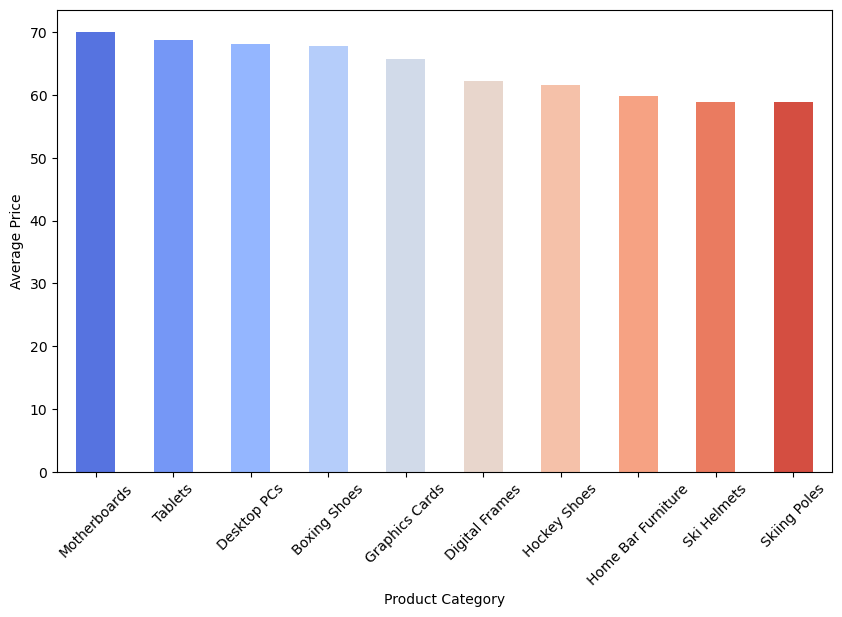

In [161]:
# colors for the top 10 categories
colors = sns.color_palette("coolwarm", 10)

# average price of products for the top 10 product categories
top_10_categories_price_avg = df_no_outliers.groupby('categoryName')['price'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_categories_price_avg.plot(kind='bar', color=colors)
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [165]:
# Calculate average price for each category
average_prices = df_no_outliers.groupby('categoryName')['price'].mean()

# Find the category with the highest average price
highest_avg_price_category = average_prices.idxmax()
highest_avg_price = round(average_prices.max(), 2)

print("Category with the highest average price:", highest_avg_price_category)
print("Highest average price:", highest_avg_price)


Category with the highest average price: Motherboards
Highest average price: 70.1


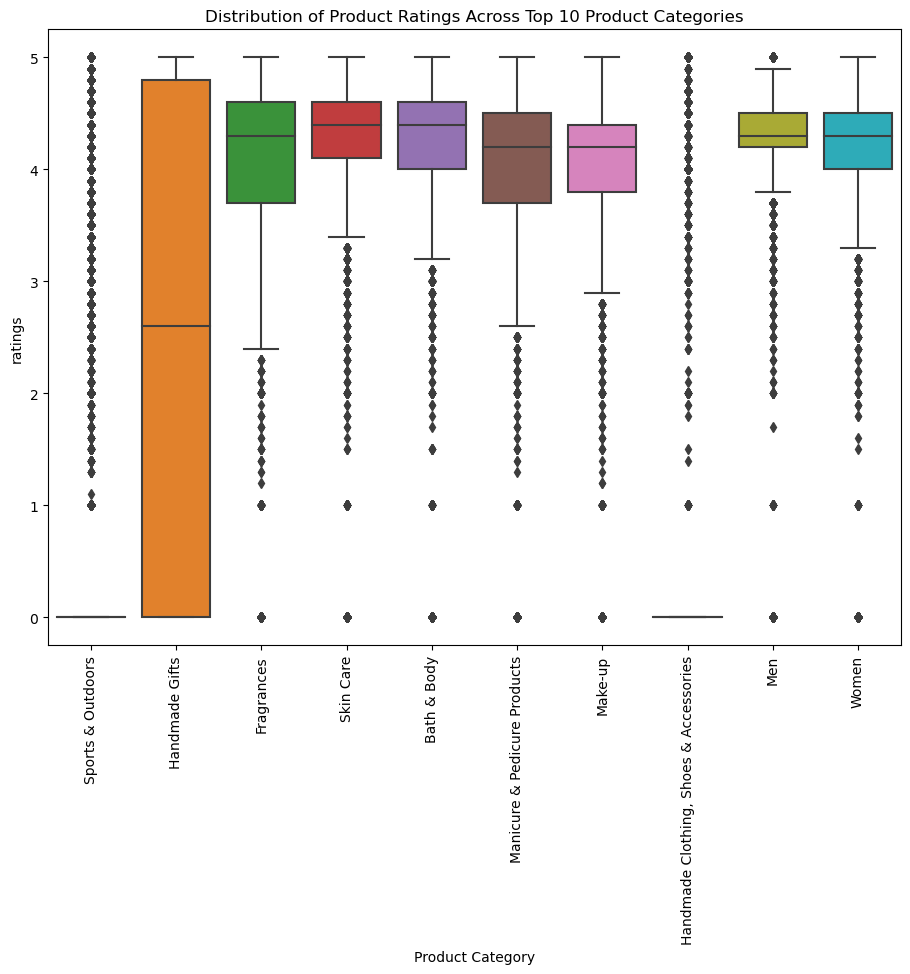

In [169]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.
#side-by-side box plots
top_10_categories_ratings = df_no_outliers['categoryName'].value_counts().head(10).index
df_top_10_categories_ratings = df_no_outliers[df_no_outliers['categoryName'].isin(top_10_categories_ratings)]
plt.figure(figsize=(11, 8))
sns.boxplot(x='categoryName', y='stars', data=df_top_10_categories_ratings)
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('ratings')
plt.xticks(rotation=90)
plt.show()


In [171]:
# Calculate median rating for each category
median_ratings = df_no_outliers.groupby('categoryName')['stars'].median()

# Find the category with the highest median rating
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print("Category with the highest median rating:", highest_median_rating_category)
print("Highest median rating:", highest_median_rating)


Category with the highest median rating: Computer Memory
Highest median rating: 4.7


# Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

In [172]:
# Calculate correlation coefficient between price and stars
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])

print(" Pearson Correlation coefficient between price and stars:", correlation_coefficient)


Correlation coefficient between price and stars: -0.06617323990742395


In [175]:
# Calculating the correlation coefficient between price and stars(spearman)
spearman_correlation =  df_no_outliers['price'].corr( df_no_outliers['stars'], method= 'spearman')
print("Spearman Correlation Coefficient between Price and Stars:", spearman_correlation)

Spearman Correlation Coefficient between Price and Stars: -0.054046934293102145


In [ ]:
# Is there a significant correlation between product price and its rating?
# The pearson correlation coefficient between price and stars is approximately -0.067. 
# This indicates a very weak negative linear correlation between product price and its rating.
# The spearman correlation coefficient between price and stars is approximately -0.05. 
# indicates a very weak negative monotonic relationship between between product price and its rating. 
# This means that when product price increases, its rating does not necessarily to increase.

In [ ]:
Use a scatter plot to visualize the relationship between product rating and price. 

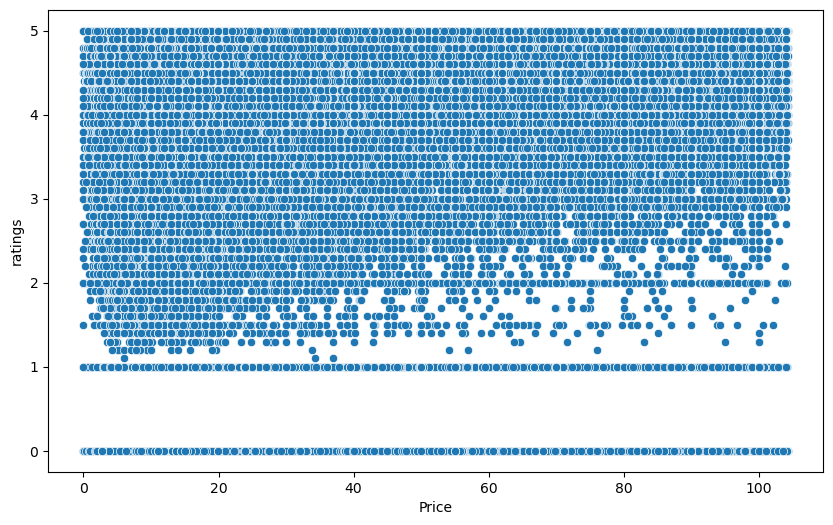

In [179]:
from scipy.stats import probplot

#Visualizing the relationship between product rating and price using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df_no_outliers)
plt.xlabel('Price')
plt.ylabel('ratings')
plt.show()

In [ ]:
What patterns can you observe?

There is no visible relationship between product rating and price.

In [ ]:
Use a correlation heatmap to visualize correlations between all numerical variables.

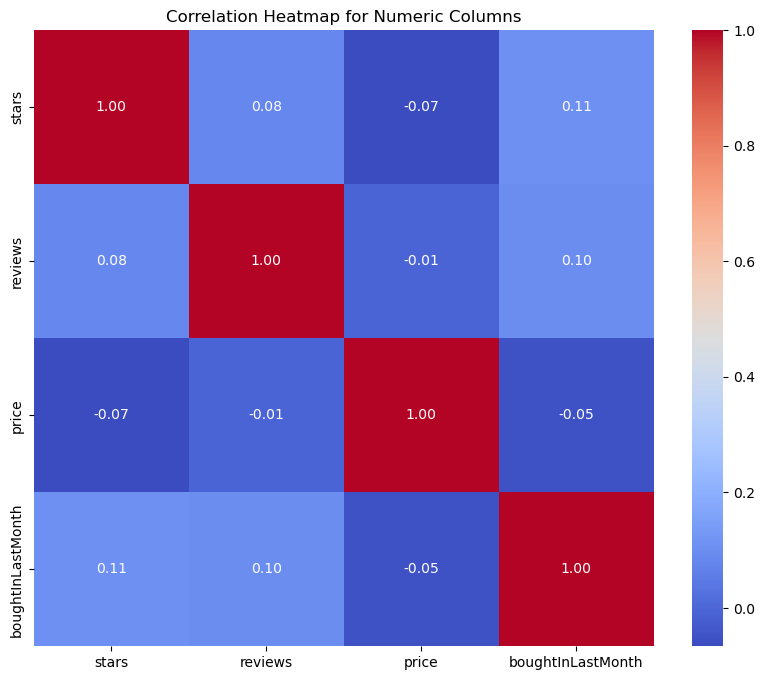

In [181]:
# only numeric columns
numeric_columns = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# correlation matrix
correlation_matrix = numeric_columns.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

The correlation heatmap indicates a very weak correlation between numerical variables in the dataset.

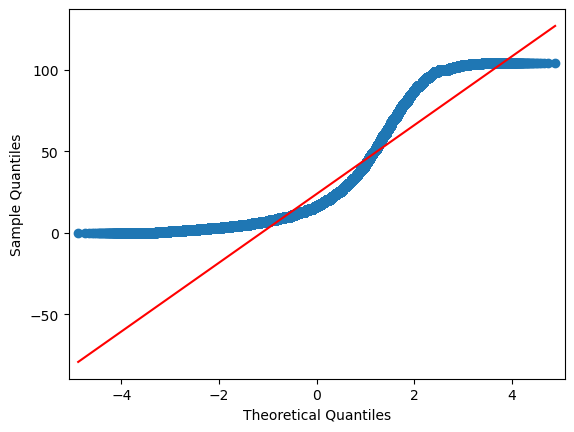

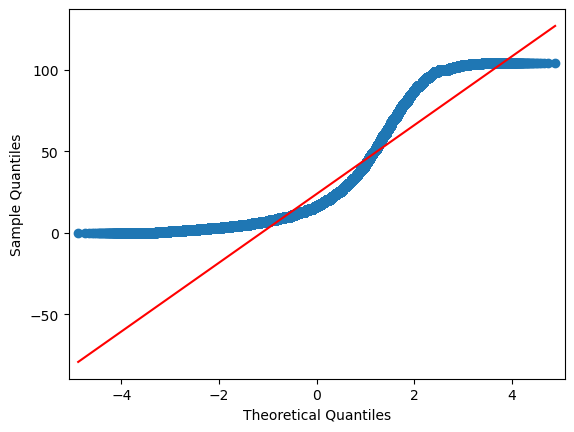

In [182]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df_no_outliers['price'], line='s')

The plot shows that product prices do not follow a normal ditribution.
Especially in the lower tail, the data points deviate significantly from the red line, suggesting a heavier tail. This indicates that there are more extreme low values in product price than would be expected in a normal distribution. It also shows a bimodal distribution with the right hand side of the plot dipping below the red line(normality) after a rise.
Also, the central portion of the data points doesn't align perfectly with the line, suggesting possible deviations from normality in the main body of the distribution as well.